In [1]:
# Importing packages for train test split
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import log_loss, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from collections import Counter
from xgboost import XGBClassifier
from scipy.stats import uniform
import warnings
warnings.filterwarnings('ignore')

In [2]:
water_wells = pd.read_csv("data/eda_df.csv", index_col = 0)

In [3]:
water_wells.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,...,status_group_num,payment_num,management_num,basin_num,qualtiy_group_num,quantity_num,source_type_num,waterpoint_type_num,region_num,extraction_num
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,...,0,5,0,6,1,0,0,0,0,0
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,...,0,0,1,0,1,1,4,0,14,0
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,...,0,1,0,1,1,0,5,3,18,0
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,1,0,0,7,1,2,2,3,17,3
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,...,0,0,7,0,1,3,4,0,6,0


In [4]:
water_wells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57588 non-null  int64  
 1   amount_tsh             57588 non-null  float64
 2   funder                 53966 non-null  object 
 3   gps_height             57588 non-null  int64  
 4   installer              53952 non-null  object 
 5   longitude              57588 non-null  float64
 6   latitude               57588 non-null  float64
 7   basin                  57588 non-null  object 
 8   subvillage             57217 non-null  object 
 9   region                 57588 non-null  object 
 10  lga                    57588 non-null  object 
 11  ward                   57588 non-null  object 
 12  population             57588 non-null  int64  
 13  permit                 54532 non-null  object 
 14  construction_year      57588 non-null  int64  
 15  ex

In [5]:
water_wells.isna().sum()

id                          0
amount_tsh                  0
funder                   3622
gps_height                  0
installer                3636
longitude                   0
latitude                    0
basin                       0
subvillage                371
region                      0
lga                         0
ward                        0
population                  0
permit                   3056
construction_year           0
extraction_type_class       0
management                  0
payment_type                0
quality_group               0
quantity                    0
source_type                 0
waterpoint_type             0
status_group                0
status_group_num            0
payment_num                 0
management_num              0
basin_num                   0
qualtiy_group_num           0
quantity_num                0
source_type_num             0
waterpoint_type_num         0
region_num                  0
extraction_num              0
dtype: int

## Creating feature called well_age to see if age plays a part in functionality

In [6]:
water_wells['construction_year'].value_counts()

0       18897
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [7]:
water_wells['construction_year'].median()

1988.0

In [8]:
age_df = water_wells.copy()

In [9]:
# Looking at median age of construction year
median_age = age_df.loc[age_df['construction_year'] != 0].median()
median_age

id                     37078.000000
amount_tsh                 0.000000
gps_height              1154.000000
longitude                 36.648187
latitude                  -6.064216
population               150.000000
permit                     1.000000
construction_year       2000.000000
status_group_num           0.000000
payment_num                1.000000
management_num             0.000000
basin_num                  3.000000
qualtiy_group_num          1.000000
quantity_num               0.000000
source_type_num            1.000000
waterpoint_type_num        0.000000
region_num                 8.000000
extraction_num             0.000000
dtype: float64

In [10]:
# Looking at mean age of construction year
mean_age = age_df.loc[age_df['construction_year'] != 0].mean()
mean_age

id                     37083.008736
amount_tsh               466.457534
gps_height              1002.367760
longitude                 35.983262
latitude                  -6.235372
population               269.799617
permit                     0.717332
construction_year       1996.814686
status_group_num           0.439043
payment_num                1.620273
management_num             1.138146
basin_num                  3.314414
qualtiy_group_num          1.207438
quantity_num               0.651443
source_type_num            1.470497
waterpoint_type_num        0.804166
region_num                 8.484454
extraction_num             1.009589
dtype: float64

In [11]:
# Final Line imputing median on 0s
water_wells['construction_year'] = water_wells['construction_year'].replace(0,median_age['construction_year'])

In [12]:
# Creating new feature well_age
water_wells['well_age'] = (2022 - water_wells['construction_year'])

In [13]:
# Confirming feature creation worked
water_wells['well_age'].value_counts()

22    20988
12     2645
14     2613
13     2533
15     1587
16     1471
19     1286
11     1256
18     1123
10     1084
20     1075
44     1037
27     1014
17     1011
23      979
24      966
32      954
37      945
42      811
26      811
38      779
40      744
28      738
50      708
48      676
25      644
30      640
29      608
21      540
34      521
39      488
47      437
36      434
46      414
52      411
31      324
33      316
35      302
41      238
45      202
43      192
49      184
9       176
51      145
62      102
55       88
59       85
54       77
53       59
58       40
60       30
61       21
57       19
56       17
Name: well_age, dtype: int64

In [14]:
splitdf = water_wells.copy()

In [15]:
splitdf.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'subvillage', 'region', 'lga', 'ward',
       'population', 'permit', 'construction_year', 'extraction_type_class',
       'management', 'payment_type', 'quality_group', 'quantity',
       'source_type', 'waterpoint_type', 'status_group', 'status_group_num',
       'payment_num', 'management_num', 'basin_num', 'qualtiy_group_num',
       'quantity_num', 'source_type_num', 'waterpoint_type_num', 'region_num',
       'extraction_num', 'well_age'],
      dtype='object')

In [16]:
# Dropping permit's null values because 2400 out of the total data set size is negligible
splitdf.dropna(subset=['permit'], inplace=True)

In [17]:
splitdf.isna().sum()

id                          0
amount_tsh                  0
funder                   1204
gps_height                  0
installer                1223
longitude                   0
latitude                    0
basin                       0
subvillage                371
region                      0
lga                         0
ward                        0
population                  0
permit                      0
construction_year           0
extraction_type_class       0
management                  0
payment_type                0
quality_group               0
quantity                    0
source_type                 0
waterpoint_type             0
status_group                0
status_group_num            0
payment_num                 0
management_num              0
basin_num                   0
qualtiy_group_num           0
quantity_num                0
source_type_num             0
waterpoint_type_num         0
region_num                  0
extraction_num              0
well_age  

In [18]:
# Creating pipeline csv
splitdf.to_csv('pipeline_df.csv')

In [19]:
# Setting up train-test split - Dropped any remaining columns with missing values
X = splitdf.drop(columns = ['funder', 'installer',
       'basin', 'subvillage', 'region', 'lga', 'ward',
       'extraction_type_class',
       'management', 'payment_type', 'quality_group', 'quantity',
       'source_type', 'waterpoint_type', 'status_group', 'status_group_num'], axis = 1)
y = splitdf['status_group_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [20]:
# Look at shape
print(X_train.shape)
print(X_test.shape)
# Check the shapes to see if the split worked
print(X_train.shape[0] == y_train.shape[0])
print(X_test.shape[0] == y_test.shape[0])

(43625, 18)
(10907, 18)
True
True


In [21]:
# Setting up Dummy Classifier for our baseline metrics
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_model.predict(X_train)
dummy_model.score(X_train, y_train)

0.5458338108882521

In [22]:
# Looking at the cross val score for our dummy model
cross_val_score(dummy_model, X_train, y_train, cv = 5).mean()

0.545833810888252

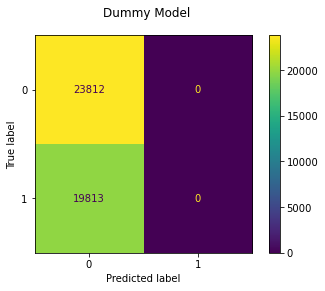

In [23]:
# Confusion matrix for the dummy model
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, values_format='');

In [24]:
# Obtaining the accuracy, recall score, and precision score for the dummy model
y_pred_dummy = dummy_model.predict(X_test)

accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
recall_dummy = recall_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy)

print(f"""
- Dummy Model - 
Accuracy score: {accuracy_dummy}
Recall score: {recall_dummy}
Precision score: {precision_dummy}
""")


- Dummy Model - 
Accuracy score: 0.5413037498853946
Recall score: 0.0
Precision score: 0.0



## Data Cleaning

In [25]:
# Looking at remaining null values
X_train.isna().sum()

id                     0
amount_tsh             0
gps_height             0
longitude              0
latitude               0
population             0
permit                 0
construction_year      0
payment_num            0
management_num         0
basin_num              0
qualtiy_group_num      0
quantity_num           0
source_type_num        0
waterpoint_type_num    0
region_num             0
extraction_num         0
well_age               0
dtype: int64

In [26]:
# Originally tried to drop nulls after split, but warnings
# Dropping permit's null values because 2400 out of the total data set size is negligible
# X_train['permit'].dropna(inplace=True)

## Decision Tree Modeling for Feature Importance

In [27]:
# Instantiate SMOTE with random_state=42
# sm = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [28]:
# Checking SMOTE results
# y_train_resampled.value_counts()

Originally tried to SMOTE multiclass. Decided to change our target into a binary matrix as the tertiary class was <10% of our dataset.

In [29]:
# Instantiating and fitting the Decision Tree Model
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [30]:
#score on train and test data to see if we are overfitting
print(f'Train Accuracy Score:{tree_clf.score(X_train, y_train)}')
print(f'Test Accuracy Score:{tree_clf.score(X_test, y_test)}')

Train Accuracy Score:0.7261203438395415
Test Accuracy Score:0.7238470706885486


In [31]:
#predictions on test
y_pred = tree_clf.predict(X_test)

#recall score
recall = recall_score(y_test, y_pred)
print(f"Recall score: {recall}")

Recall score: 0.528083150109934


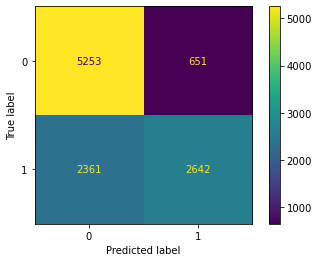

In [32]:
#plotting confusion matrix
plot_confusion_matrix(tree_clf, X_test, y_test);

In [33]:
#feature importance 
feat_import = {name: score 
                   for name, score 
                       in zip(X_train.columns, tree_clf.feature_importances_)
}
feat_import

{'id': 0.0,
 'amount_tsh': 0.06389757959188014,
 'gps_height': 0.007065792537314767,
 'longitude': 0.008413611969309166,
 'latitude': 0.001347677023509384,
 'population': 0.0,
 'permit': 0.0,
 'construction_year': 0.045920673467083443,
 'payment_num': 0.0,
 'management_num': 0.0,
 'basin_num': 0.0,
 'qualtiy_group_num': 0.0,
 'quantity_num': 0.4315405820639554,
 'source_type_num': 0.014039318002151368,
 'waterpoint_type_num': 0.376360419863301,
 'region_num': 0.014942911056437585,
 'extraction_num': 0.0,
 'well_age': 0.03647143442505767}

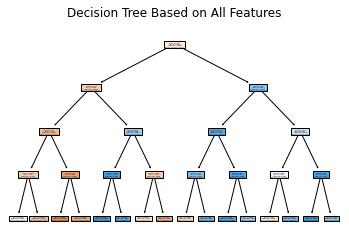

In [34]:
plt.figure()
plot_tree(tree_clf, filled = True)
plt.title("Decision Tree Based on All Features")
plt.show()

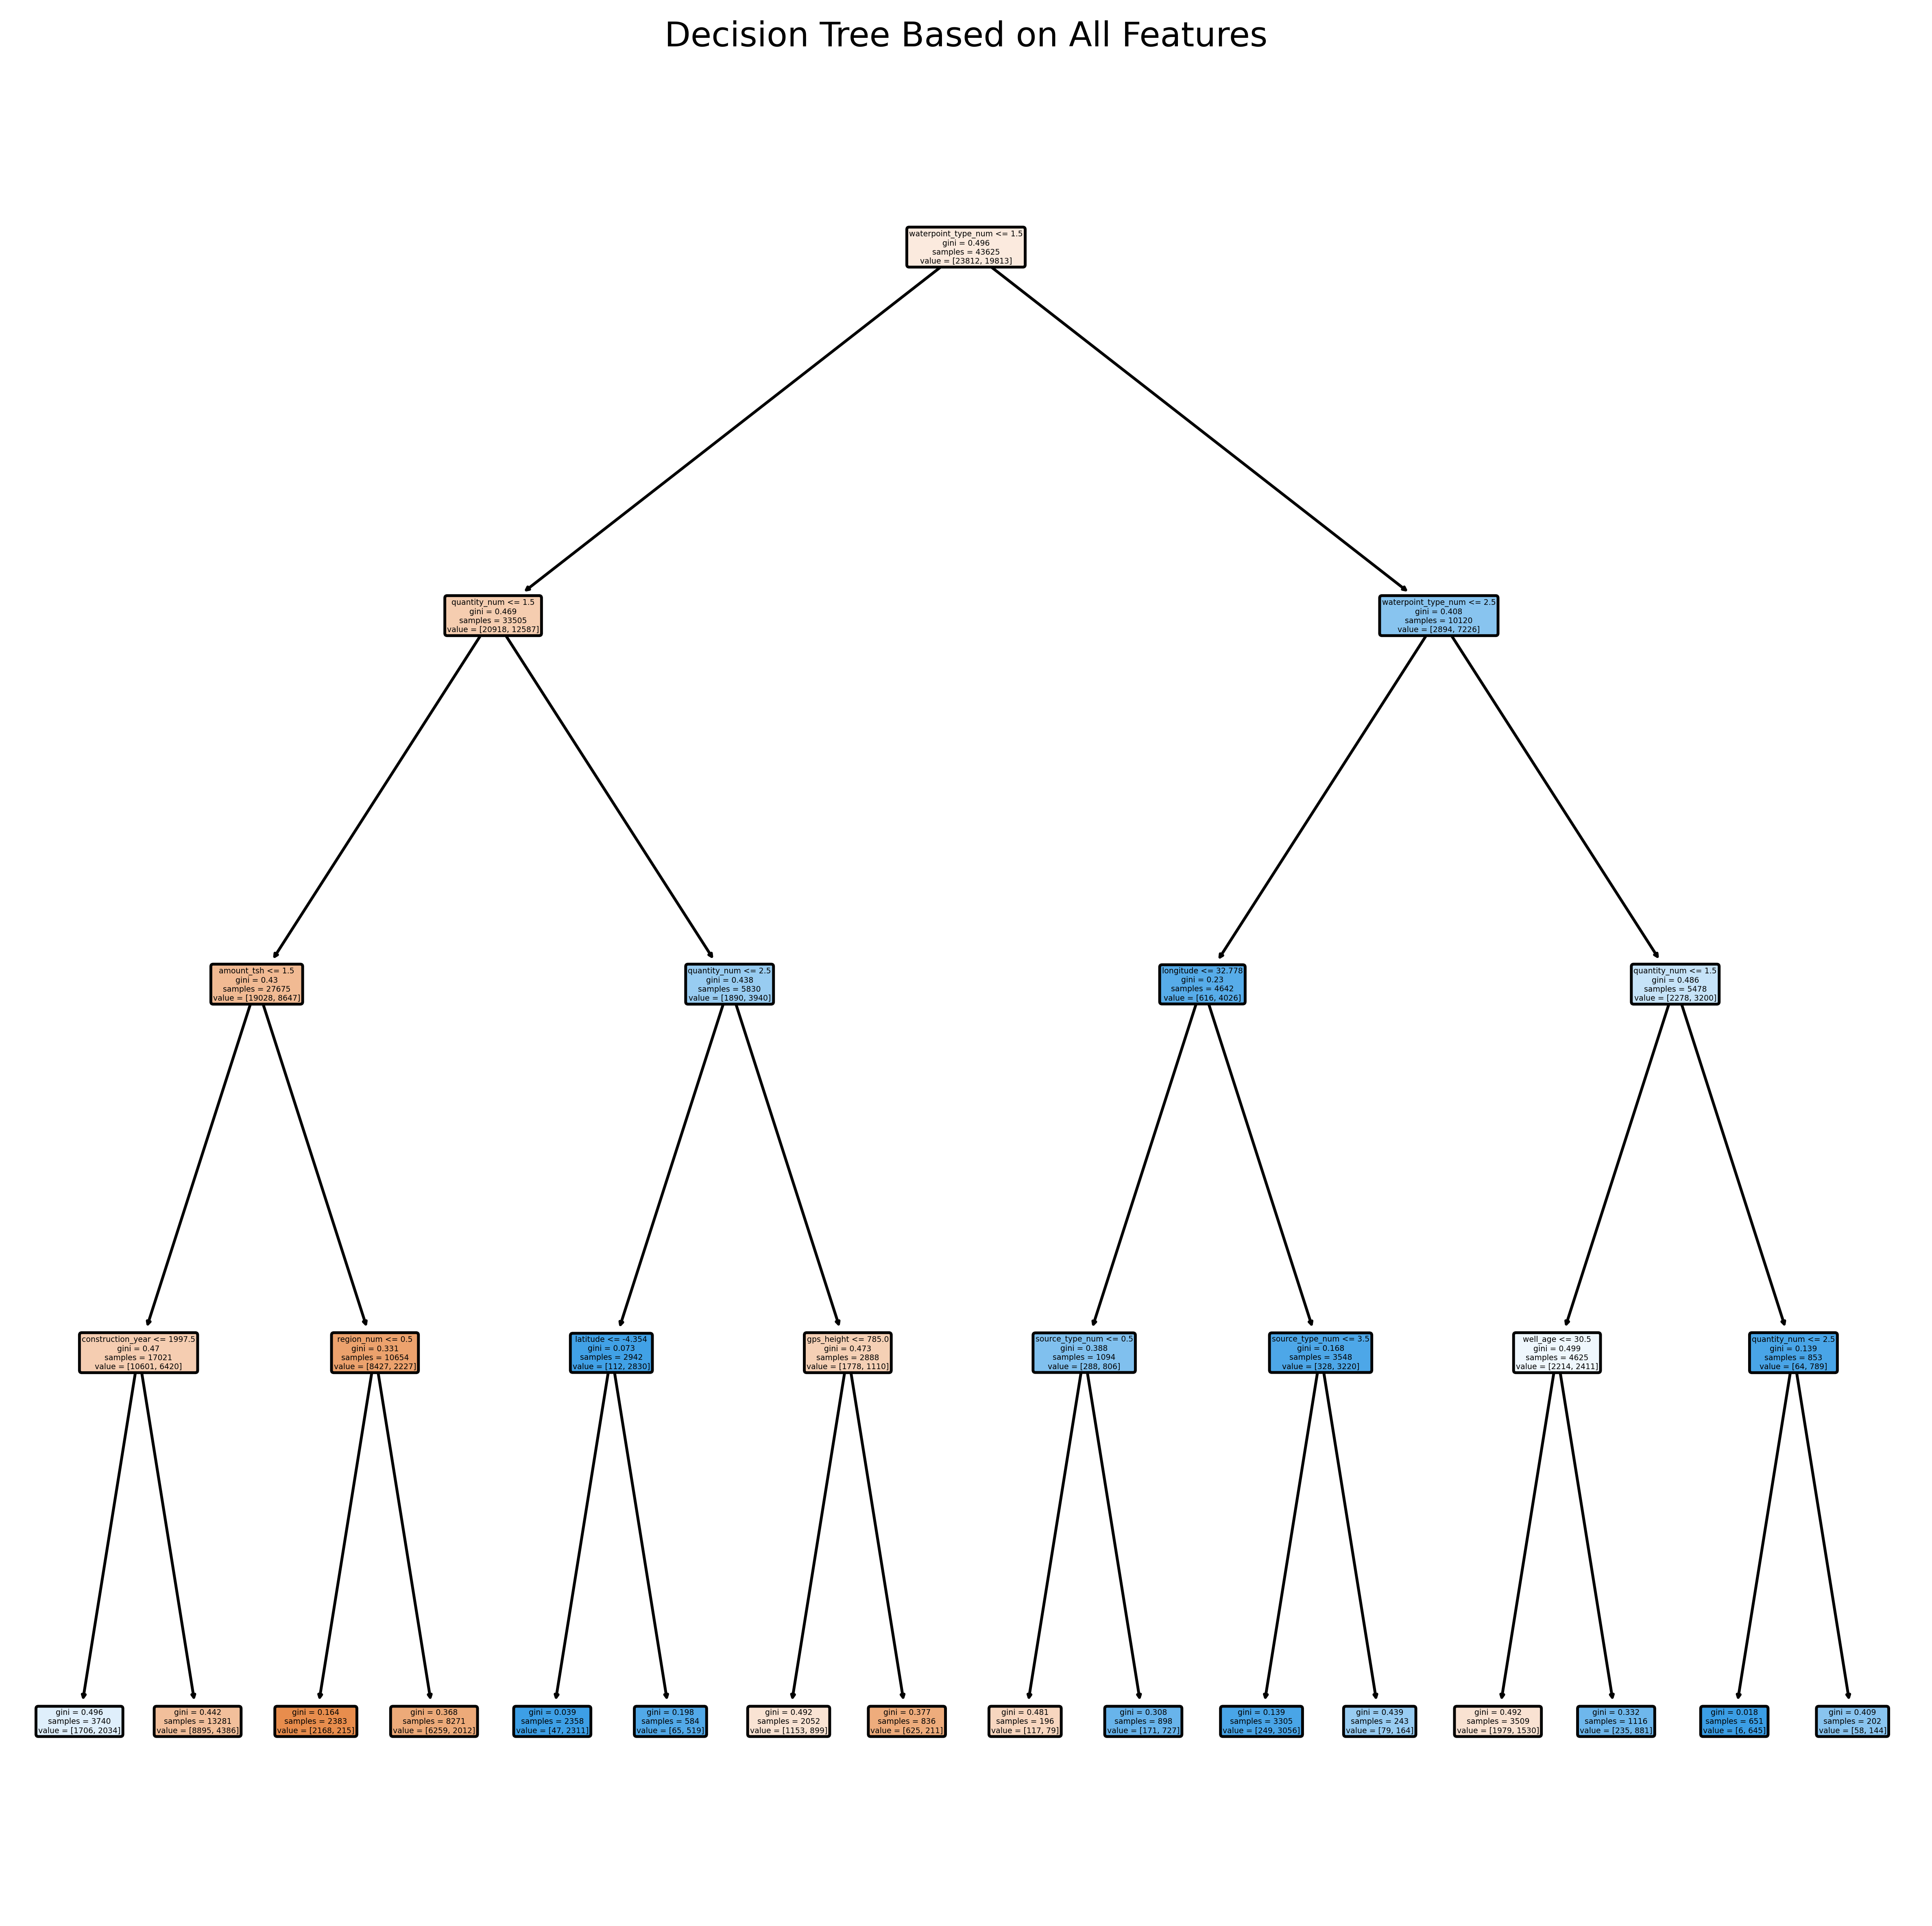

In [35]:
plt.figure(figsize=(12,12), dpi = 500)
plot_tree(tree_clf,
 feature_names = X.columns,
 filled = True, rounded = True)
plt.title("Decision Tree Based on All Features")
plt.show()

Takeaway here is that anything related to the geographic area of where the well is located (latitude), extraction_num, and quantity.

## Standard Scaling our Data and performing a Simple Logistic Regression

In [36]:
# Instantiating and scaling data
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

simple_log_model = LogisticRegression(random_state=42)
simple_log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [37]:
#predictions on test
y_pred = simple_log_model.predict(X_test_scaled)

#recall score
recall = recall_score(y_test, y_pred)
print(f"Recall score: {recall}")

Recall score: 0.5864481311213272


In [38]:
# Trying to figure out how to interpret a multinomial log loss
log_loss(y_test, simple_log_model.predict_proba(X_test_scaled))

0.5924743969151737

In [39]:
# Checking out to see if we overfit the data or not
y_pred_train = simple_log_model.predict(X_train_scaled)
y_pred_test = simple_log_model.predict(X_test_scaled)

print(f"Train Recall Score: {recall_score(y_train, y_pred_train)}")
print(f"Test Recall Score: {recall_score(y_test, y_pred_test)}")

Train Recall Score: 0.5866855095139555
Test Recall Score: 0.5864481311213272


## Running a Grid Search with our Logistic Regression Model

In [49]:
#logistic regression grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1e-3, 1e-1, 1e2, 1e4, 1e6],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': ['balanced', None]
}

In [50]:
#GridSearchCV
grid_search = GridSearchCV(simple_log_model, param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameter Combination Found During Grid Search:")
grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'C': 100.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

## Rerunning our Logistic Regression

In [51]:
# Changing hyperparameters to reflect GridSearch Results
grid1_log_model = LogisticRegression(random_state=42, C= 100.0, 
                                      class_weight= None, penalty= 'l2', 
                                      solver= 'lbfgs')
grid1_log_model.fit(X_train_scaled, y_train)

LogisticRegression(C=100.0, random_state=42)

In [52]:
# Predictions on test
y_pred_grid = grid1_log_model.predict(X_test_scaled)

#Recall Score
recall_grid = recall_score(y_test, y_pred_grid)
print(f"Recall score: {recall_grid}")

Recall score: 0.5864481311213272


## Trying out Randomized Search CV

In [61]:
# Setting up a Randomized Search for our Simple Logistic Regression
distributions = dict(C=uniform(loc=0, scale=4),
                      penalty=['l2', 'l1'])
rando_search = RandomizedSearchCV(simple_log_model, distributions, random_state=0)
search = rando_search.fit(X_train, y_train)
search.best_params_

{'C': 2.4942547871438894, 'penalty': 'l2'}

In [62]:
# Changing hyperparameters to reflect Randomized Search Results
rando1_log_model = LogisticRegression(random_state=42, C= 2.4942547871438894, 
                                      penalty= 'l2')
rando1_log_model.fit(X_train_scaled, y_train)

LogisticRegression(C=2.4942547871438894, random_state=42)

In [63]:
# Predictions on test
y_pred_grid = rando1_log_model.predict(X_test_scaled)

# Recall Score
recall_grid = recall_score(y_test, y_pred_grid)
print(f"Recall score: {recall_grid}")

Recall score: 0.5864481311213272


## Potentially trying to perform an ROC Curve Analysis

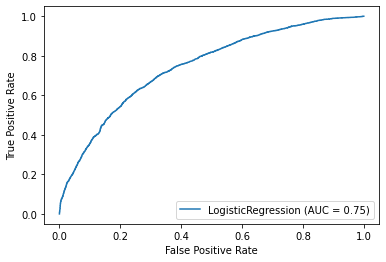

In [40]:
# Performing an ROC Curve to see how well our data performs
plot_roc_curve(simple_log_model, X_test_scaled, y_test);

## Random Forest Modeling

In [41]:
# Instantiate the Decision Tree
ct = DecisionTreeClassifier(random_state=42)

ct.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
# Finding max_samples amount
X_train.shape

(43625, 18)

In [43]:
# Instantiate the Random Forest Model
rfc = RandomForestClassifier(max_features='sqrt',
                            max_samples=None,
                            random_state=42)

In [44]:
# Fit the model 
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', random_state=42)

In [45]:
scores = cross_val_score(estimator=rfc, X=X_train,
               y=y_train, cv=5)
scores

array([0.8113467 , 0.81363897, 0.81169054, 0.81948424, 0.81455587])

In [46]:
# Cross val scores averaged
scores.mean()

0.8141432664756447

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      5904
           1       0.83      0.76      0.79      5003

    accuracy                           0.82     10907
   macro avg       0.82      0.81      0.81     10907
weighted avg       0.82      0.82      0.82     10907



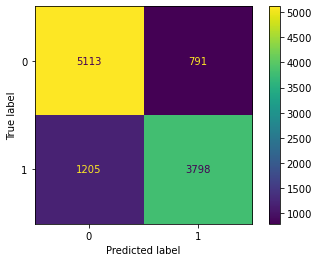

In [47]:
# Test set predictions
pred = rfc.predict(X_test)

# Confusion matrix and classification report
print(plot_confusion_matrix(rfc, X_test, y_test));
print(classification_report(y_test, pred));

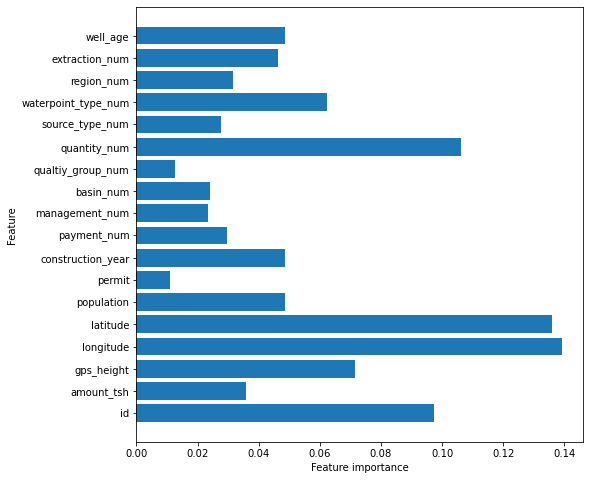

In [48]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rfc)

Dropping the following features: qualtiy_group_num_group_num, permit, id. Then running another random forest.

## XGBoost

In [53]:
# Setting up train-test split - Dropped columns that didn't do well in our Decision Tree ('qualtiy_group_num', 'permit', 'id')
X = splitdf.drop(columns = ['funder', 'installer', 'extraction_type_class',
       'basin', 'subvillage', 'region', 'lga', 'ward',
       'management', 'payment_type', 'quality_group', 'quantity',
       'source_type', 'waterpoint_type', 'status_group', 'status_group_num',
       'qualtiy_group_num', 'permit', 'id'], axis = 1)
y = splitdf['status_group_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [54]:
# Instantiate the encoder
encoder = LabelEncoder()

# Fit and transform the training data
y_train = pd.Series(encoder.fit_transform(y_train))

# Transform the test data
y_test = pd.Series(encoder.transform(y_test))

In [55]:
# Confirming Y values start at 0
y_train.value_counts().sort_index()

0    23812
1    19813
dtype: int64

In [56]:
# Confirming Y values start at 0
y_test.value_counts().sort_index()

0    5904
1    5003
dtype: int64

In [57]:
# Instantiate XGBClassifier
boost_clf = XGBClassifier()

# Fit XGBClassifier
boost_clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = boost_clf.predict(X_train)
test_preds = boost_clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 85.33%
Validation accuracy: 80.83%


In [58]:
# Checking Recall Score of training and test sets
training_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Recall: {:.4}%'.format(training_recall * 100))
print('Validation Recall: {:.4}%'.format(test_recall * 100))

Training Recall: 77.77%
Validation Recall: 72.52%


In [59]:
X_train.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'construction_year', 'payment_num', 'management_num', 'basin_num',
       'quantity_num', 'source_type_num', 'waterpoint_type_num', 'region_num',
       'extraction_num', 'well_age'],
      dtype='object')

## GridSearch on our XGBoost

In [64]:
# Creating the parameter grid for our GridSearch
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6, 10],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [66]:
# Finding the best XGBoost model for Recall
grid_clf_boost = GridSearchCV(boost_clf, param_grid, scoring='recall', cv=None, n_jobs=1)
grid_clf_boost.fit(X_train, y_train)

best_parameters = grid_clf_boost.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf_boost.predict(X_train)
test_preds = grid_clf_boost.predict(X_test)
training_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_recall * 100))
print('Validation accuracy: {:.4}%'.format(test_recall * 100))

[15:31:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:31:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:31:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This ma

[15:32:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters a

[15:32:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This ma

[15:32:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters a

[15:32:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:33:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This ma

[15:33:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:33:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:33:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters a

[15:33:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:33:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:33:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This ma

[15:33:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:33:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:33:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters a

[15:34:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:34:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:34:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, class_weight, penalty, solver } might not be used.

  This ma

[15:34:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:34:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:34:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, penalty, solver } might not be used.

  This may not be accurate due to some parameters a

C: 0.001
class_weight: 'balanced'
penalty: 'l1'
solver: 'lbfgs'

Training Accuracy: 77.77%
Validation accuracy: 72.52%